# Compare Ground Truth Masks with Generated Masks
This notebook compares the ground truth masks in `/test/masks` with the masks generated by different methods (`kmeans`, `otsu`, `unet`) located in `/test/kmeans`, `/test/otsu`, and `/test/unet` respectively.

In [89]:
# Import Required Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
import pandas as pd

In [90]:
# Define Paths
ground_truth_path = "../data/test/masks"
kmeans_path = "../data/test/masks/kmeans"
otsu_path = "../data/test/masks/otsu"
unet_path = "../data/test/masks/unet"

In [91]:
# Function to Load Masks
def load_masks(path):
    masks = {}
    for file_name in os.listdir(path):
        if file_name.endswith(('.png', '.tif')):
            mask = cv2.imread(os.path.join(path, file_name), cv2.IMREAD_GRAYSCALE)
            masks[os.path.splitext(file_name)[0]] = mask
    return masks

In [92]:
# Load All Masks
ground_truth_masks = load_masks(ground_truth_path)
kmeans_masks = load_masks(kmeans_path)
otsu_masks = load_masks(otsu_path)
unet_masks = load_masks(unet_path)

In [93]:
# Function to Compare Masks
def compare_masks(ground_truth, generated):
    scores = {}
    for file_name, gt_mask in ground_truth.items():
        if file_name in generated:
            gen_mask = generated[file_name]
            # Flatten masks for comparison
            gt_flat = gt_mask.flatten()
            gen_flat = gen_mask.flatten()
            # Normalize mask values to binary (0 and 1)
            gt_flat = (gt_mask.flatten() > 0).astype(int)
            gen_flat = (gen_mask.flatten() > 0).astype(int)
            # Compute Jaccard Index
            score = jaccard_score(gt_flat, gen_flat, average='binary')
            scores[file_name] = score
    return scores

In [94]:
# Compare and Display Results
kmeans_scores = compare_masks(ground_truth_masks, kmeans_masks)
otsu_scores = compare_masks(ground_truth_masks, otsu_masks)
unet_scores = compare_masks(ground_truth_masks, unet_masks)

print("KMeans Scores:", kmeans_scores)
print("Otsu Scores:", otsu_scores)
print("UNet Scores:", unet_scores)

KMeans Scores: {'Original_1_b1_pib_msk': 0.8868721639805978, 'Original_1_b2_pib_msk': 0.7562122229684352, 'Original_1_b3_pib_msk': 0.6397888495628763, 'Original_1_b4_pib_msk': 0.6429219675593617}
Otsu Scores: {'Original_1_b1_pib_msk': 0.8886558210403329, 'Original_1_b2_pib_msk': 0.7717705404561075, 'Original_1_b3_pib_msk': 0.5540309396948414, 'Original_1_b4_pib_msk': 0.46292297015961137}
UNet Scores: {'Original_1_b1_pib_msk': 0.74732241352827, 'Original_1_b2_pib_msk': 0.7972121614038667, 'Original_1_b3_pib_msk': 0.7155218580005074, 'Original_1_b4_pib_msk': 0.8801700214283205}


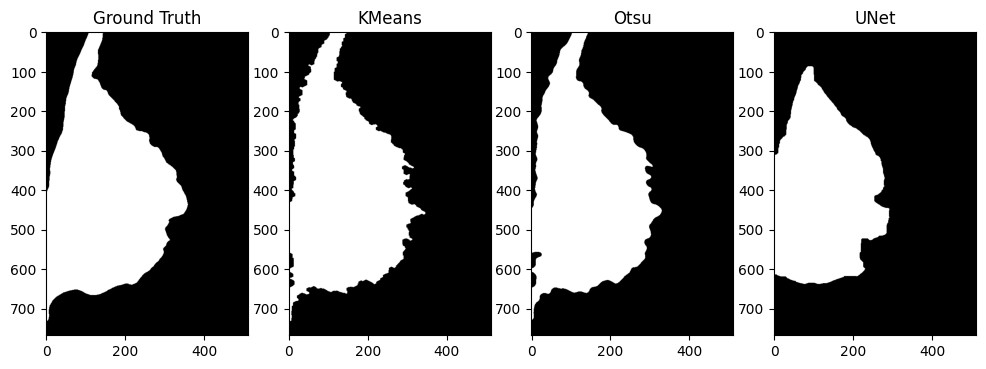

In [95]:
# Visualize Comparison for a Sample
sample_file = list(ground_truth_masks.keys())[0]  # Take the first file as a sample

plt.figure(figsize=(12, 8))

plt.subplot(1, 4, 1)
plt.title("Ground Truth")
plt.imshow(ground_truth_masks[sample_file], cmap='gray')

plt.subplot(1, 4, 2)
plt.title("KMeans")
plt.imshow(kmeans_masks.get(sample_file, np.zeros_like(ground_truth_masks[sample_file])), cmap='gray')

plt.subplot(1, 4, 3)
plt.title("Otsu")
plt.imshow(otsu_masks.get(sample_file, np.zeros_like(ground_truth_masks[sample_file])), cmap='gray')

plt.subplot(1, 4, 4)
plt.title("UNet")
plt.imshow(unet_masks.get(sample_file, np.zeros_like(ground_truth_masks[sample_file])), cmap='gray')

plt.show()

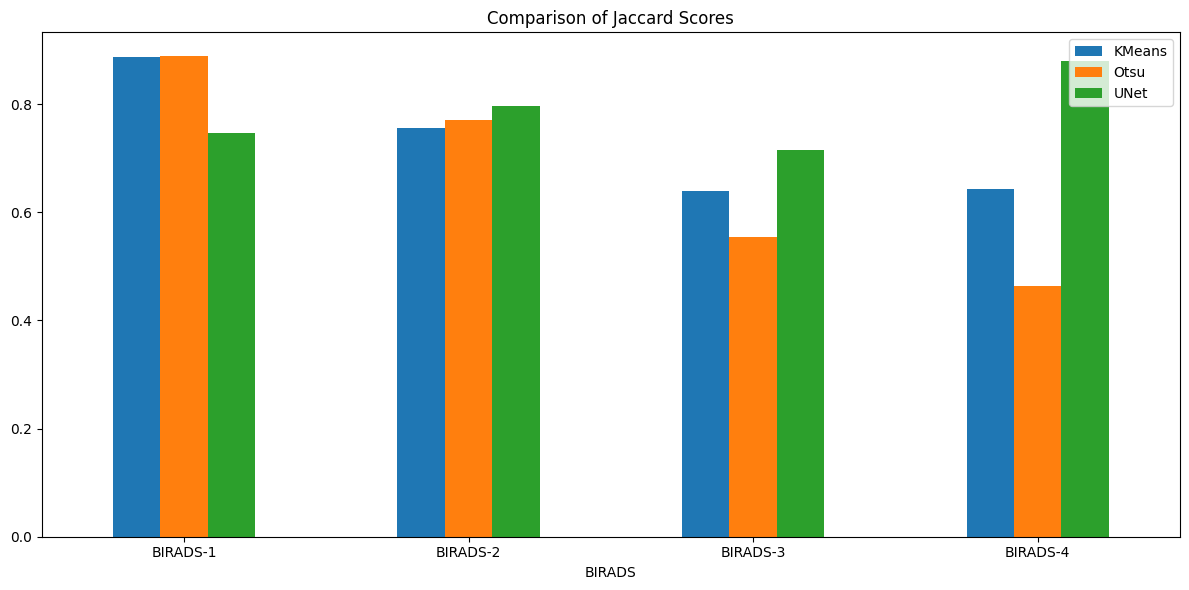

In [96]:
# Visualize Scores Comparison
# Update data for visualization with BIRADS labels
data = {
    "BIRADS": ["BIRADS-1", "BIRADS-2", "BIRADS-3", "BIRADS-4"],
    "KMeans": list(kmeans_scores.values()),
    "Otsu": list(otsu_scores.values()),
    "UNet": list(unet_scores.values())
}
df = pd.DataFrame(data)

# Plot the scores with updated labels
df.plot(x="BIRADS", kind="bar", figsize=(12, 6), title="Comparison of Jaccard Scores")
plt.xticks(rotation=0)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

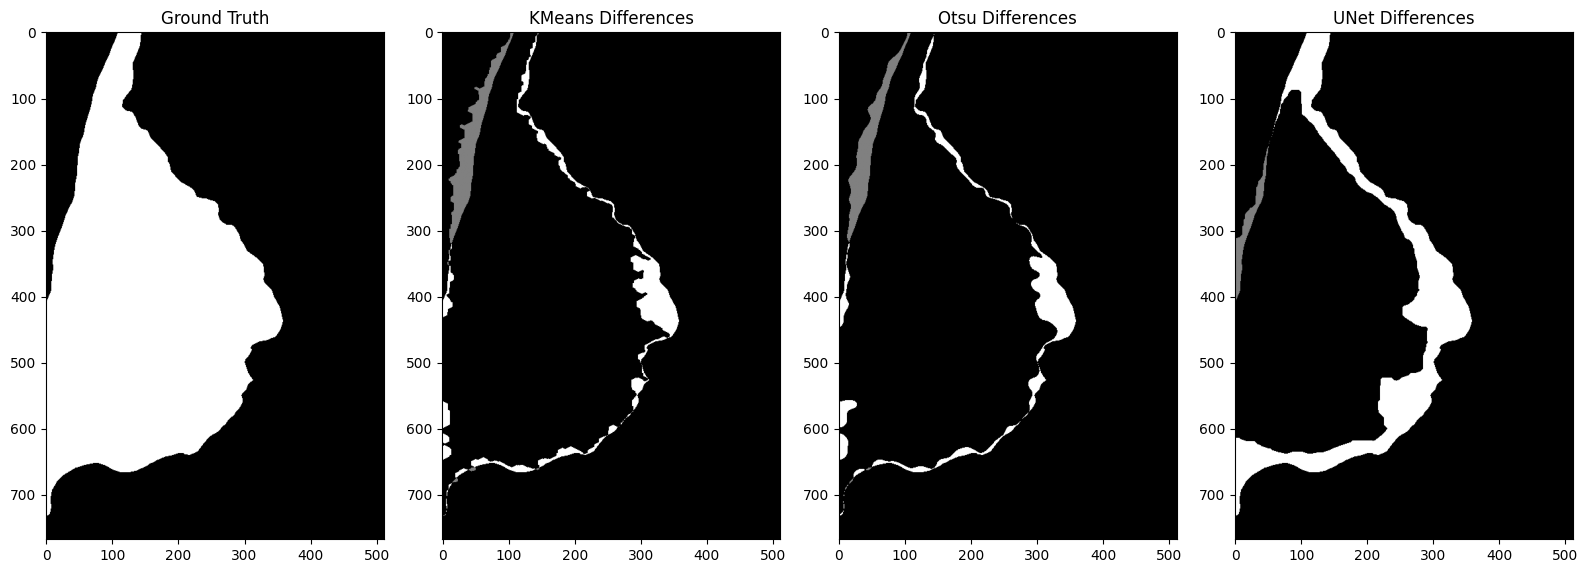

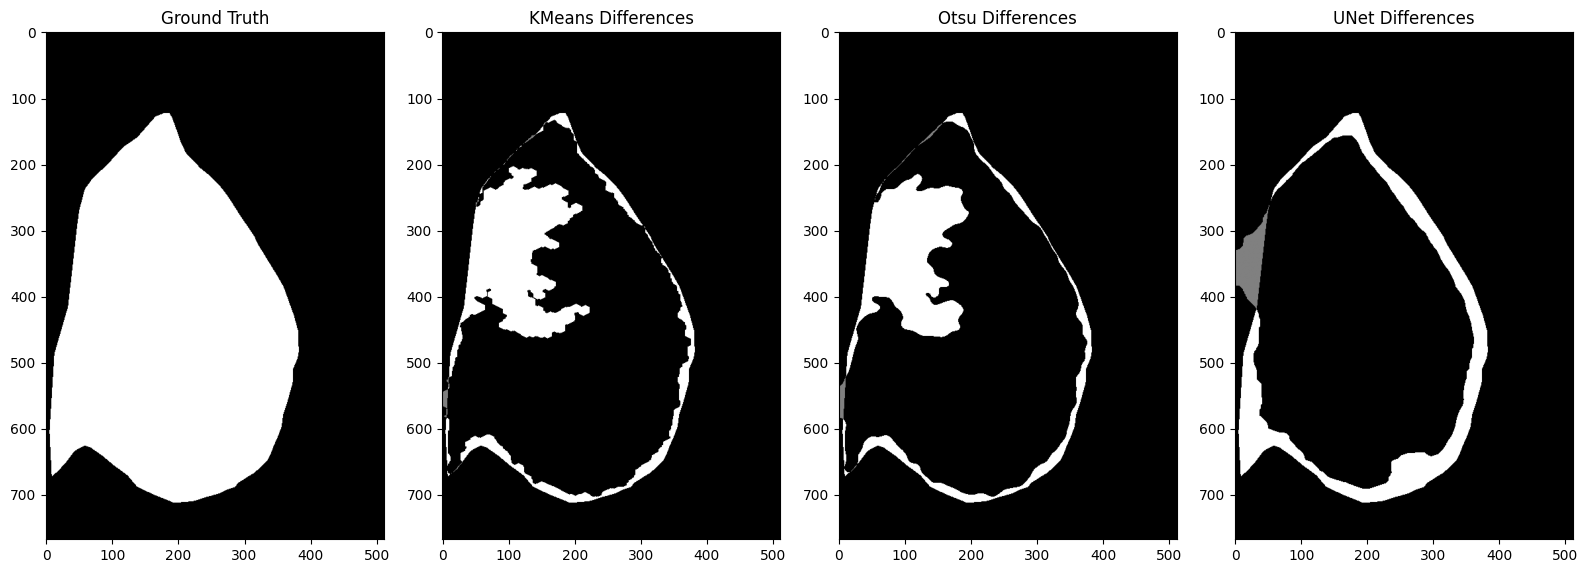

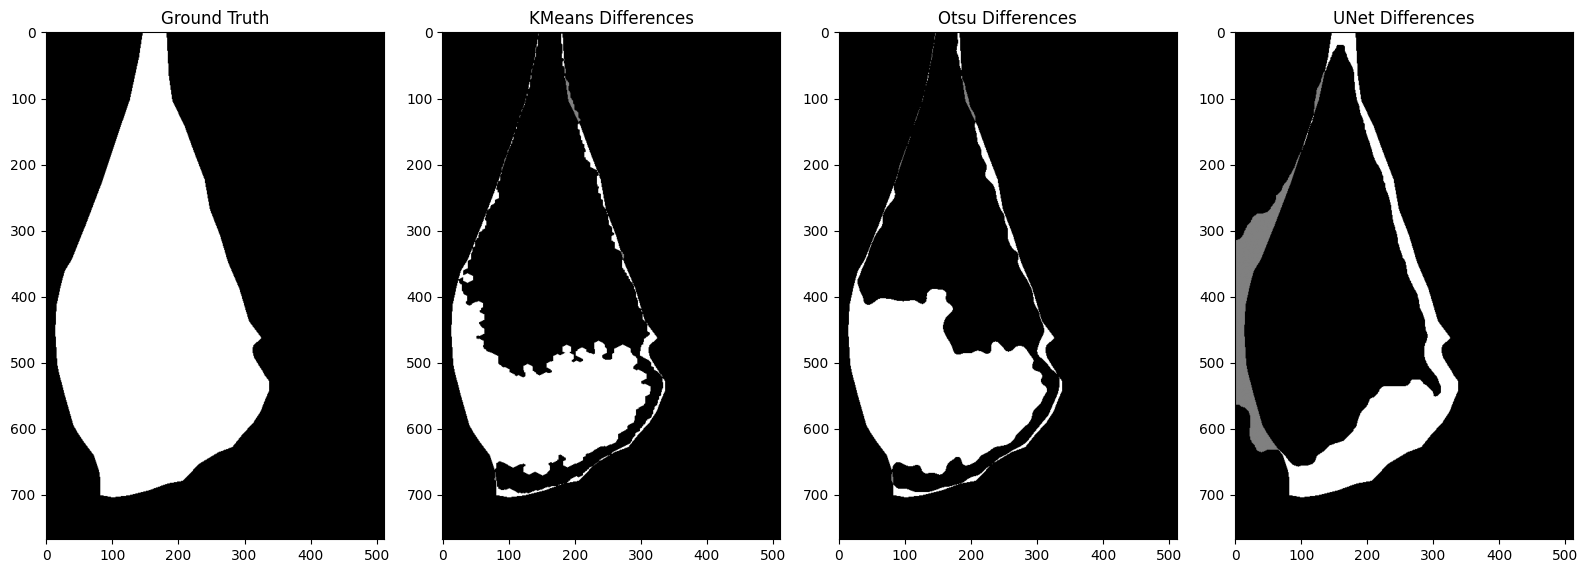

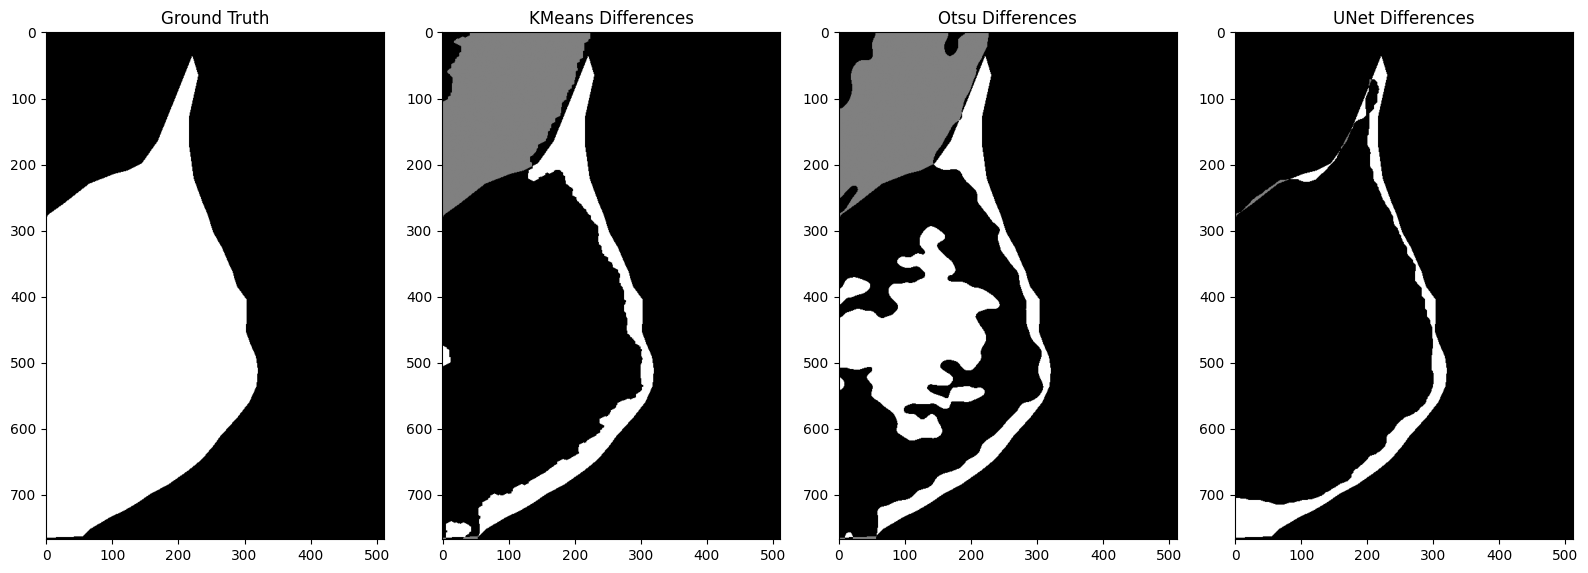

In [97]:
# Visualize Differences Between Ground Truth and Generated Masks
for file_name, gt_mask in ground_truth_masks.items():
    if file_name in kmeans_masks:
        kmeans_diff = np.zeros_like(gt_mask)
        kmeans_diff[(gt_mask == 255) & (kmeans_masks[file_name] == 0)] = 255  # False negatives in red
        kmeans_diff[(gt_mask == 0) & (kmeans_masks[file_name] == 255)] = 128  # False positives in green

    if file_name in otsu_masks:
        otsu_diff = np.zeros_like(gt_mask)
        otsu_diff[(gt_mask == 255) & (otsu_masks[file_name] == 0)] = 255  # False negatives in red
        otsu_diff[(gt_mask == 0) & (otsu_masks[file_name] == 255)] = 128  # False positives in green

    if file_name in unet_masks:
        unet_diff = np.zeros_like(gt_mask)
        unet_diff[(gt_mask == 255) & (unet_masks[file_name] == 0)] = 255  # False negatives in red
        unet_diff[(gt_mask == 0) & (unet_masks[file_name] == 255)] = 128  # False positives in green

    plt.figure(figsize=(16, 8))

    plt.subplot(1, 4, 1)
    plt.title("Ground Truth")
    plt.imshow(gt_mask, cmap='gray')

    plt.subplot(1, 4, 2)
    plt.title("KMeans Differences")
    plt.imshow(kmeans_diff, cmap='gray')

    plt.subplot(1, 4, 3)
    plt.title("Otsu Differences")
    plt.imshow(otsu_diff, cmap='gray')

    plt.subplot(1, 4, 4)
    plt.title("UNet Differences")
    plt.imshow(unet_diff, cmap='gray')
    plt.tight_layout()
    plt.show()